In [133]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [135]:
image_root_path = "./cut_results/cut_image/"
mask_root_path = "./cut_results/cut_pre_mask/"
image_names = os.listdir(image_root_path)

for name in image_names:
    image = cv2.imread(image_root_path + name, cv2.IMREAD_GRAYSCALE)

    # blur
    bilateral_blurred = cv2.bilateralFilter(image, 71, 75, 75)
    cv2.imwrite("./artificial_prior/blurred/" + name, bilateral_blurred)

    # 定义结构元素
    kernel = np.ones((3,3), np.uint8)
    # 腐蚀运算
    erosion = cv2.erode(bilateral_blurred, kernel, iterations = 3)
    cv2.imwrite("./artificial_prior/eroded/" + name, erosion)
    # 膨胀运算
    dilation = cv2.dilate(erosion, kernel, iterations = 3)
    cv2.imwrite("./artificial_prior/dilated/" + name, dilation)    

    roi = cv2.imread(mask_root_path + name, cv2.IMREAD_GRAYSCALE)
    roi = np.array(roi > 128, dtype=np.uint8) * 255
    edges = cv2.Canny(roi, 100, 200)
    cv2.imwrite("./artificial_prior/edge/" + name, edges) 


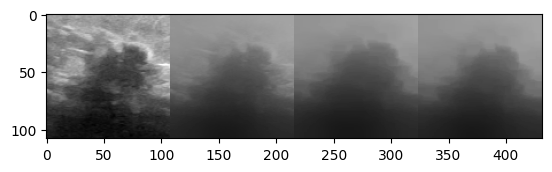

In [100]:
image_path = "./cut_results/cut_image/malignant_4.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
bilateral_blurred = cv2.bilateralFilter(image, 71, 75, 75)
plt.imshow(np.concatenate([image, bilateral_blurred], axis=1), cmap="gray")

# 定义结构元素
kernel = np.ones((3,3), np.uint8)

# 腐蚀运算
erosion = cv2.erode(bilateral_blurred, kernel, iterations = 3)

# 膨胀运算
dilation = cv2.dilate(erosion, kernel, iterations = 3)
plt.imshow(np.concatenate([image, bilateral_blurred, erosion, dilation], axis=1), cmap="gray")

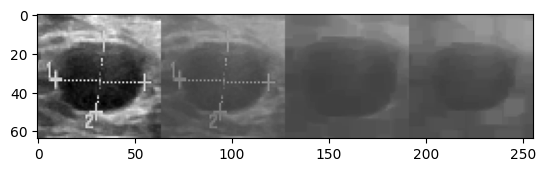

In [106]:
image_path = "./cut_results/cut_image/benign_6.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
bilateral_blurred = cv2.bilateralFilter(image, 71, 75, 75)
plt.imshow(np.concatenate([image, bilateral_blurred], axis=1), cmap="gray")

# 定义结构元素
kernel = np.ones((3,3), np.uint8)

# 腐蚀运算
erosion = cv2.erode(bilateral_blurred, kernel, iterations = 3)

# 膨胀运算
dilation = cv2.dilate(erosion, kernel, iterations = 3)
plt.imshow(np.concatenate([image, bilateral_blurred, erosion, dilation], axis=1), cmap="gray")

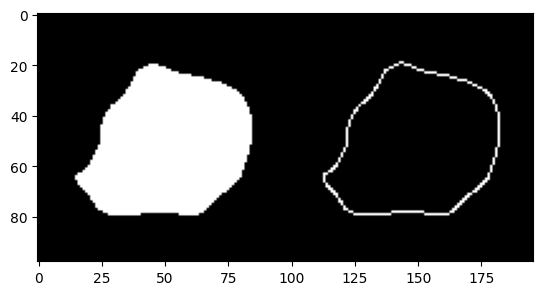

In [132]:
image_path = "./cut_results/cut_pre_mask/malignant_5.png"
edge = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
edge = np.array(edge > 128, dtype=np.uint8) * 255
edges = cv2.Canny(edge, 100, 200)

plt.imshow(np.concatenate([edge, edges], axis=1), cmap="gray")